> **Đề tài: DỰ BÁO RỦI RO TÀI CHÍNH DOANH NGHIỆP NIÊM YẾT TRÊN SÀN CHỨNG KHOÁN VIỆT NAM THÔNG QUA PHÂN TÍCH DỮ LIỆU VÀ MÔ HÌNH HỌC MÁY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import files
# uploaded = files.upload()

Saving Data_BCTT19-24_KLTN.csv to Data_BCTT19-24_KLTN.csv


In [20]:
df = pd.read_csv('data/Data_BCTT17-24_KLTN.csv')

# DATA REVIEW

In [3]:
print(df.shape)
print(df['Risk'].value_counts())

(9882, 30)
Risk
0    6216
1    3666
Name: count, dtype: int64


In [4]:
df.head()

,STT,Stock_code,Year,CR,QR,ITR,DSO,FATR,ATR,DAR,...,LDA,PRE,IRR,IT,CPtoAR,FAR,STDR,TDR,LogTA,Risk
0,1,DAN,2019,1.506128,1.177626,4.632021,216.640781,2.405827,0.641762,0.443795,...,0.022035,0.296435,0.370269,2.700741,0.982347,0.266753,0.950348,0.443795,27.388612,0
1,2,DAN,2020,3.647414,2.927267,4.465722,175.458808,2.135173,0.553379,0.172072,...,0.000000,0.190055,0.412025,2.427036,1.130583,0.259173,1.000000,0.172072,27.305167,0
2,3,DAN,2021,2.405084,2.025810,4.695759,116.178422,2.907912,0.522605,0.293437,...,0.000000,0.339755,0.378098,2.644819,1.769528,0.179718,1.000000,0.293437,27.510526,0
3,4,DAN,2022,2.380485,2.002520,6.372319,148.644942,3.959878,0.521120,0.395507,...,0.179142,0.319499,0.308307,3.243519,1.249861,0.131600,0.547059,0.395507,27.702642,0
4,5,DAN,2024,1.417062,1.211113,6.941229,236.402484,5.214157,0.358477,0.520672,...,0.269907,0.468433,0.303598,3.293830,0.732665,0.068751,0.481617,0.520672,28.098603,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9882 entries, 0 to 9881
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STT         9882 non-null   int64  
 1   Stock_code  9882 non-null   object 
 2   Year        9882 non-null   int64  
 3   CR          9882 non-null   float64
 4   QR          9882 non-null   float64
 5   ITR         9882 non-null   float64
 6   DSO         9882 non-null   float64
 7   FATR        9882 non-null   float64
 8   ATR         9882 non-null   float64
 9   DAR         9882 non-null   float64
 10  EAR         9882 non-null   float64
 11  DER         9882 non-null   float64
 12  ROS         9882 non-null   float64
 13  ROA         9882 non-null   float64
 14  ROE         9882 non-null   float64
 15  CFR         9882 non-null   float64
 16  WCTA        9882 non-null   float64
 17  ARtoCA      9882 non-null   float64
 18  STR         9882 non-null   float64
 19  SDA         9882 non-null  

In [6]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
STT,9882.0,4941.500000,2.852832e+03,1.000000,2471.250000,4941.500000,7411.750000,9.882000e+03
Year,9882.0,2020.388079,2.237690e+00,2017.000000,2018.000000,2020.000000,2022.000000,2.024000e+03
CR,9882.0,3.545943,4.795472e+01,0.001511,1.068275,1.452935,2.526488,4.700571e+03
QR,9882.0,1.877962,4.113211e+00,-0.516188,0.552117,0.964137,1.767623,1.531579e+02
ITR,9882.0,2886.888447,9.866065e+04,-0.126033,2.774208,6.314734,18.288457,4.433811e+06
DSO,9882.0,18353.290272,1.649459e+06,-105725.382700,36.198394,80.487834,184.616795,1.638491e+08
FATR,9882.0,42.905839,6.046071e+02,-2.959967,1.537085,4.714246,12.694769,3.937361e+04
ATR,9882.0,1.122596,2.296336e+00,-0.050494,0.331332,0.794098,1.394713,1.857314e+02
DAR,9882.0,0.607720,1.986049e+00,0.000000,0.282858,0.485059,0.680042,1.046228e+02
EAR,9882.0,0.391386,1.986015e+00,-103.622847,0.319308,0.513223,0.716635,1.018654e+00


# EDA

In [21]:
df = df.drop(columns=['STT'])

# Kiểm tra dữ liệu thiếu
print(df.isnull().sum())

df = df.fillna(0)

Stock_code    0
Year          0
CR            0
QR            0
ITR           0
DSO           0
FATR          0
ATR           0
DAR           0
EAR           0
DER           0
ROS           0
ROA           0
ROE           0
CFR           0
WCTA          0
ARtoCA        0
STR           0
SDA           0
LDA           0
PRE           0
IRR           0
IT            0
CPtoAR        0
FAR           0
STDR          0
TDR           0
LogTA         0
Risk          0
dtype: int64


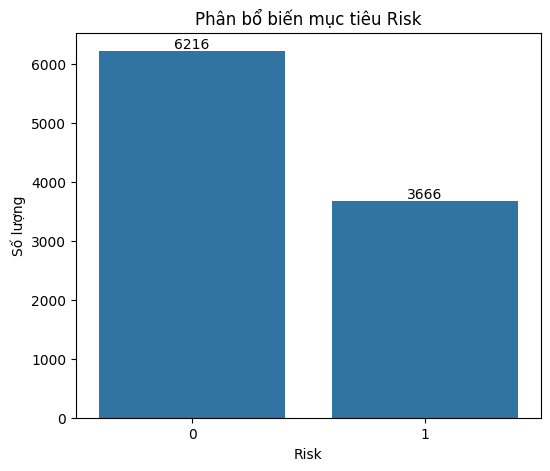

In [8]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Risk', data=df)
for c in ax.containers:
    ax.bar_label(c, label_type='edge')
plt.title('Phân bổ biến mục tiêu Risk')
plt.xlabel('Risk')
plt.ylabel('Số lượng')
plt.show()

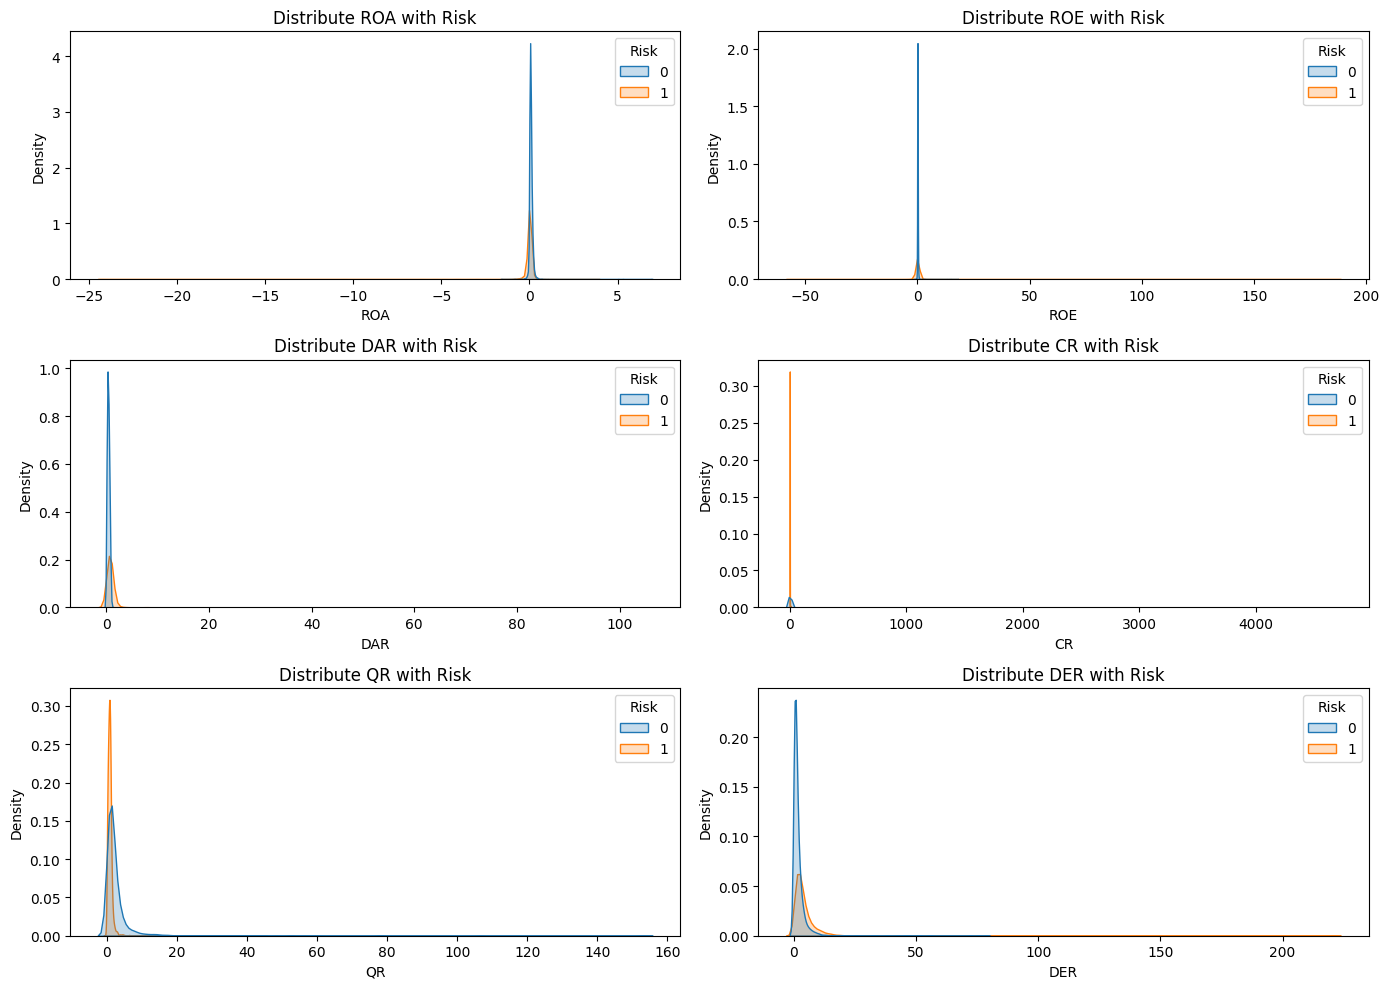

In [9]:
financial_cols = ['ROA', 'ROE', 'DAR', 'CR', 'QR', 'DER']

plt.figure(figsize=(14, 10))
for i, col in enumerate(financial_cols):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(data=df, x=col, hue='Risk', fill=True)
    plt.title(f"Distribute {col} with Risk")
    # plt.xlabel(col)
    # plt.ylabel('Density')
plt.tight_layout()
plt.show()

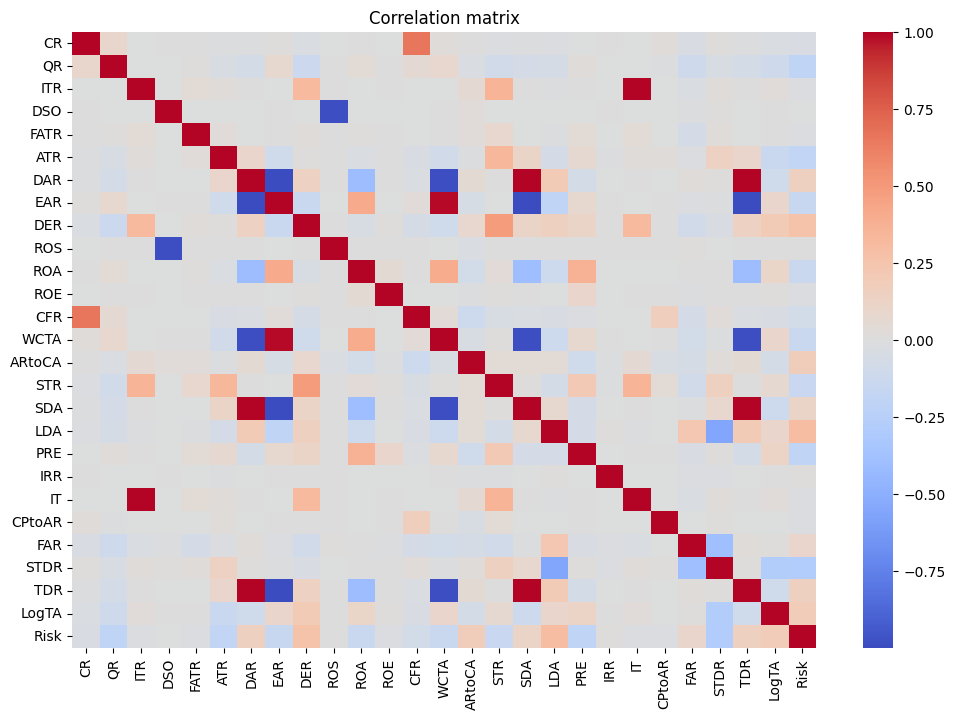

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Stock_code', 'Year']).corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Correlation matrix")
plt.show()

In [22]:
corr_with_risk = (df.drop(columns=['Stock_code'])).corr()['Risk'].sort_values(key=abs, ascending=False)
print("Highly correlated with Risk:\n")
print(corr_with_risk.head(10))

Highly correlated with Risk:

Risk      1.000000
LDA       0.299654
STDR     -0.286930
DER       0.258609
QR       -0.200431
PRE      -0.195430
LogTA     0.191188
ATR      -0.183887
ARtoCA    0.172551
TDR       0.149104
Name: Risk, dtype: float64


# PREPARING

In [23]:
X = df.drop(columns=["Risk", "Year", 'Stock_code'])
y = df["Risk"]

> Scale Features

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

>Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Restore column names for DataFrame format
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# MODELS

> models

In [26]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "SVM": SVC(probability=True, kernel='rbf'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "MLP Neural Net": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

In [27]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'F1 Score': f1_score(y_test, preds),
        'ROC AUC': roc_auc_score(y_test, probs)
    })
benchmark_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("Model Benchmarking:\n", benchmark_df)

[LightGBM] [Info] Number of positive: 2572, number of negative: 4345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 6917, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371838 -> initscore=-0.524342
[LightGBM] [Info] Start training from score -0.524342
Model Benchmarking:
                  Model  Accuracy  F1 Score   ROC AUC
3             LightGBM  0.982799  0.976573  0.998856
2              XGBoost  0.981450  0.974689  0.998739
6       MLP Neural Net  0.980101  0.973218  0.997503
5     GradientBoosting  0.977740  0.969613  0.998174
1        Random Forest  0.972344  0.962282  0.996939
4                  SVM  0.952782  0.936073  0.985656
0  Logistic Regression  0.945025  0.925469  0.982294


# MODEL TUNING

> Gridsearch top 5 models
- LightGBM
- XGBoost
- MLP Neural Net
- GradientBoosting
- Random Forest

In [28]:
models = {
    "LightGBM": LGBMClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "MLP Neural Net": MLPClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier()
}
param_grids = {
    "LightGBM": {
        'n_estimators': [100, 200],
        'max_depth': [6, 10, -1],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    "MLP Neural Net": {
        'hidden_layer_sizes': [(100,), (100, 50), (150,)],
        'alpha': [0.0001, 0.001],
        'learning_rate_init': [0.001, 0.01],
        'max_iter': [300, 500]
    },
    "GradientBoosting": {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0]
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
}

In [29]:
best_models = {}
for name in models:
    print(f"Running GridSearch for {name}...")
    grid = GridSearchCV(models[name], param_grids[name], cv=3, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}\n")

Running GridSearch for LightGBM...
[LightGBM] [Info] Number of positive: 2572, number of negative: 4345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 6917, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371838 -> initscore=-0.524342
[LightGBM] [Info] Start training from score -0.524342
Best params for LightGBM: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'subsample': 0.8}

Running GridSearch for XGBoost...
Best params for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}

Running GridSearch for MLP Neural Net...
Best params for MLP Neural Net: {'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 300}

Running Gr

> Result models tunning

In [30]:
results_tuned = []

for name, model in best_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    results_tuned.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'F1 Score': f1_score(y_test, preds),
        'ROC AUC': roc_auc_score(y_test, probs)
    })

benchmark_tuned = pd.DataFrame(results_tuned).sort_values(by="F1 Score", ascending=False)
print("=> Model Performance After Hyperparameter Tuning:\n")
print(benchmark_tuned)


[LightGBM] [Info] Number of positive: 2572, number of negative: 4345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 6917, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371838 -> initscore=-0.524342
[LightGBM] [Info] Start training from score -0.524342
=> Model Performance After Hyperparameter Tuning:

              Model  Accuracy  F1 Score   ROC AUC
0          LightGBM  0.983474  0.977471  0.998884
1           XGBoost  0.982799  0.976422  0.999063
3  GradientBoosting  0.981788  0.975138  0.998675
2    MLP Neural Net  0.980438  0.973850  0.997516
4     Random Forest  0.970658  0.960000  0.997200


> LightGBM best

# FEATURES SELECTION

> LightGBM with Feature Selection Methods

In [36]:
lgbm = best_models['LightGBM']

# === Feature Selection Methods ===

# (1) LightGBM feature importance
lgbm.fit(X_train, y_train)
feature_importances = pd.Series(lgbm.feature_importances_, index=X.columns).rank(pct=True)

# (2) RFE with LightGBM
rfe = RFE(estimator=LGBMClassifier(random_state=42), n_features_to_select=15)
rfe.fit(X_train, y_train)
rfe_ranks = pd.Series(rfe.ranking_, index=X.columns).apply(lambda x: 1 if x == 1 else 0)

# (3) SelectFromModel with threshold='median'
sfm = SelectFromModel(LGBMClassifier(random_state=42), threshold='median')
sfm.fit(X_train, y_train)
sfm_support = pd.Series(sfm.get_support().astype(int), index=X.columns)

# (4) L1 (LassoCV)
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
lasso_coef = pd.Series(np.abs(lasso.coef_), index=X.columns)
lasso_rank = (lasso_coef > 1e-5).astype(int)

[LightGBM] [Info] Number of positive: 2572, number of negative: 4345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 6917, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371838 -> initscore=-0.524342
[LightGBM] [Info] Start training from score -0.524342
[LightGBM] [Info] Number of positive: 2572, number of negative: 4345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 6917, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371838 -> initscore=-0.524342
[LightGBM] [Info] Start training from score -0.524342
[LightGBM] [Info] 

In [37]:
feature_selection_matrix = pd.DataFrame({
    'LGBM_Importance': feature_importances,
    'RFE': rfe_ranks,
    'SelectFromModel': sfm_support,
    'Lasso': lasso_rank
})

# Mean selection
feature_selection_matrix['Mean_Score'] = feature_selection_matrix.mean(axis=1)
feature_selection_matrix = feature_selection_matrix.sort_values(by='Mean_Score', ascending=False)

print("Top features matrix:\n")
print(feature_selection_matrix.head(20))

Top features matrix:

        LGBM_Importance  RFE  SelectFromModel  Lasso  Mean_Score
ATR            1.000000    1                1      1    1.000000
ROA            0.961538    1                1      1    0.990385
DAR            0.923077    1                1      1    0.980769
PRE            0.846154    1                1      1    0.961538
STR            0.692308    1                1      1    0.923077
DER            0.615385    1                1      1    0.903846
LDA            0.576923    1                1      1    0.894231
WCTA           0.884615    1                1      0    0.721154
EAR            0.807692    1                1      0    0.701923
CR             0.769231    1                1      0    0.692308
ROS            0.730769    1                1      0    0.682692
DSO            0.653846    1                1      0    0.663462
QR             0.461538    1                0      1    0.615385
SDA            0.538462    1                0      0    0.384615
FAT

In [38]:
Selected_features = feature_selection_matrix.sort_values(by='Mean_Score', ascending=False).head(15).index.tolist()
print("Top 15 Selected Features:", Selected_features)

Top 15 Selected Features: ['ATR', 'ROA', 'DAR', 'PRE', 'STR', 'DER', 'LDA', 'WCTA', 'EAR', 'CR', 'ROS', 'DSO', 'QR', 'SDA', 'FATR']


> Feature Selection with RFE

In [24]:
# rfe = RFE(estimator=LGBMClassifier(use_label_encoder=False, eval_metric='logloss'), n_features_to_select=15)
# rfe.fit(X_train_df, y_train)
# selected_features = X_train_df.columns[rfe.support_]
# print("Selected Top Features via RFE:", list(selected_features))

> Reduce data

In [39]:
X_train_selected = X_train_df[Selected_features]
X_test_selected = X_test_df[Selected_features]

> Re-test full models wth important features

In [41]:
results = []
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    preds = model.predict(X_test_selected)
    probs = model.predict_proba(X_test_selected)[:, 1]
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'F1 Score': f1_score(y_test, preds),
        'ROC AUC': roc_auc_score(y_test, probs)
    })
benchmark_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("Model Benchmarking:\n", benchmark_df)

[LightGBM] [Info] Number of positive: 2572, number of negative: 4345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 6917, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371838 -> initscore=-0.524342
[LightGBM] [Info] Start training from score -0.524342
Model Benchmarking:
               Model  Accuracy  F1 Score   ROC AUC
0          LightGBM  0.982799  0.976552  0.998894
2    MLP Neural Net  0.980438  0.973708  0.997382
1           XGBoost  0.980438  0.973223  0.998778
3  GradientBoosting  0.976391  0.967742  0.998043
4     Random Forest  0.975042  0.965930  0.997479


# LightGBM Tuning with Importance feature

In [43]:
lgbm_selected = best_models['LightGBM']

# re-train wth selected features
lgbm_selected.fit(X_train_selected, y_train)

# predict & evaluate
y_pred_sel = lgbm_selected.predict(X_test_selected)
y_prob_sel = lgbm_selected.predict_proba(X_test_selected)[:, 1]

[LightGBM] [Info] Number of positive: 2572, number of negative: 4345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 6917, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371838 -> initscore=-0.524342
[LightGBM] [Info] Start training from score -0.524342


In [44]:
print("Final Evaluation with Selected Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_sel))
print("F1 Score:", f1_score(y_test, y_pred_sel))
print("ROC AUC:", roc_auc_score(y_test, y_prob_sel))

Final Evaluation with Selected Features:
Accuracy: 0.981787521079258
F1 Score: 0.9752066115702479
ROC AUC: 0.9989207933658838


In [46]:
print("Classification Report:\n", classification_report(y_test, y_pred_sel))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sel))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1871
           1       0.98      0.97      0.98      1094

    accuracy                           0.98      2965
   macro avg       0.98      0.98      0.98      2965
weighted avg       0.98      0.98      0.98      2965

Confusion Matrix:
 [[1849   22]
 [  32 1062]]


# Cross-Validated

In [47]:
cv_scores = cross_val_score(lgbm_selected, X_train_selected, y_train, cv=5, scoring='f1')
print("Cross-Validated F1 Score (train):", np.mean(cv_scores))

[LightGBM] [Info] Number of positive: 2057, number of negative: 3476
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 5533, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371769 -> initscore=-0.524634
[LightGBM] [Info] Start training from score -0.524634
[LightGBM] [Info] Number of positive: 2057, number of negative: 3476
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 5533, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371769 -> initscore=-0.524634
[LightGBM] [Info] Start training from score -0.524634
[LightGBM] [Info] 

In [48]:
# All
full_scores = cross_val_score(lgbm_selected,
                              X_train_df, y_train,
                              scoring='f1', cv=5)

# important
selected_scores = cross_val_score(lgbm_selected,
                                   X_train_selected, y_train,
                                   scoring='f1', cv=5)

[LightGBM] [Info] Number of positive: 2057, number of negative: 3476
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 5533, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371769 -> initscore=-0.524634
[LightGBM] [Info] Start training from score -0.524634
[LightGBM] [Info] Number of positive: 2057, number of negative: 3476
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 5533, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371769 -> initscore=-0.524634
[LightGBM] [Info] Start training from score -0.524634
[LightGBM] [Info] 

In [50]:
print("Stability Comparison:")
print(f"Full Features CV F1 Score: {full_scores.mean():.4f} ± {full_scores.std():.4f}")
print(f"Selected Features CV F1 Score: {selected_scores.mean():.4f} ± {selected_scores.std():.4f}")

Stability Comparison:
Full Features CV F1 Score: 0.9677 ± 0.0061
Selected Features CV F1 Score: 0.9683 ± 0.0073


# MODEL RESULT

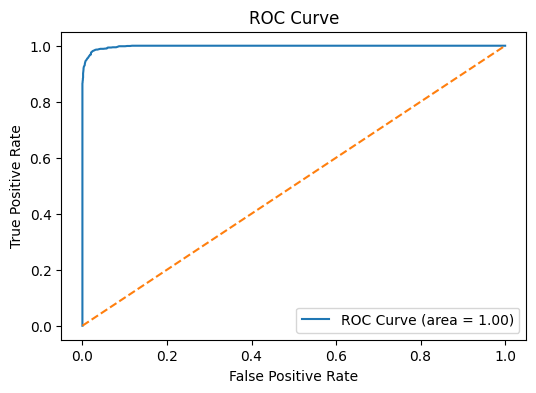

In [51]:
fpr, tpr, _ = roc_curve(y_pred_sel, probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, probs))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

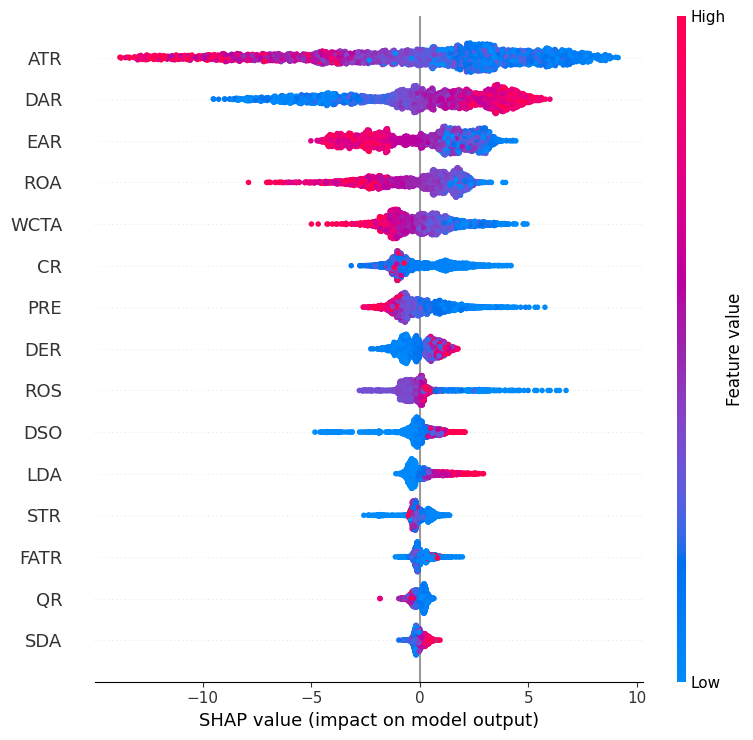

In [52]:
explainer = shap.TreeExplainer(lgbm_selected)
shap_values = explainer.shap_values(X_test_selected)

shap.summary_plot(shap_values, X_test_selected)

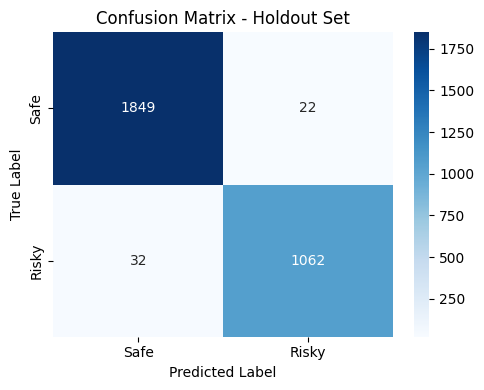

In [55]:
cm = confusion_matrix(y_test, y_pred_sel)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Safe", "Risky"], yticklabels=["Safe", "Risky"])
plt.title("Confusion Matrix - Holdout Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# RE-TEST

> Evaluate on Holdout (2017-2023 Data)

[LightGBM] [Info] Number of positive: 2369, number of negative: 3853
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 6222, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380746 -> initscore=-0.486384
[LightGBM] [Info] Start training from score -0.486384

- Evaluation on Holdout
Accuracy: 0.9798
F1 Score: 0.9721
ROC AUC: 0.9980

- Classification Report:
              precision    recall  f1-score   support

        Safe       0.98      0.99      0.98      1696
       Risky       0.97      0.97      0.97       971

    accuracy                           0.98      2667
   macro avg       0.98      0.98      0.98      2667
weighted avg       0.98      0.98      0.98      2667



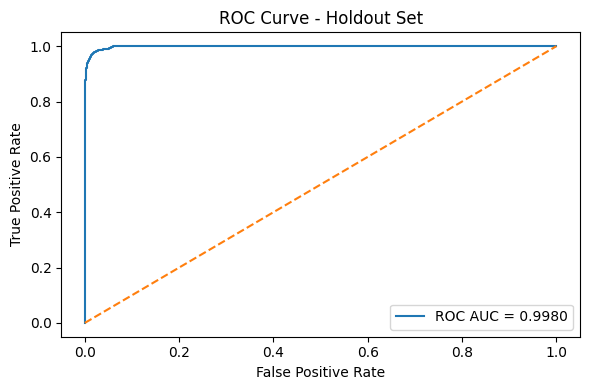

In [58]:
df_filtered = df[(df['Year'] >= 2017) & (df['Year'] <= 2023)]
X = df_filtered.drop(columns=["Risk", "Year", "Stock_code"])
y = df_filtered["Risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_selected = X_train[Selected_features]
X_test_selected = X_test[Selected_features]

lgbm_selected.fit(X_train_selected, y_train)
# Predictions
y_pred = lgbm_selected.predict(X_test_selected)
y_prob = lgbm_selected.predict_proba(X_test_selected)[:, 1]

# Metrics
print("\n- Evaluation on Holdout")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")

# Classification Report
print("\n- Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Safe", "Risky"]))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_prob):.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Holdout Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


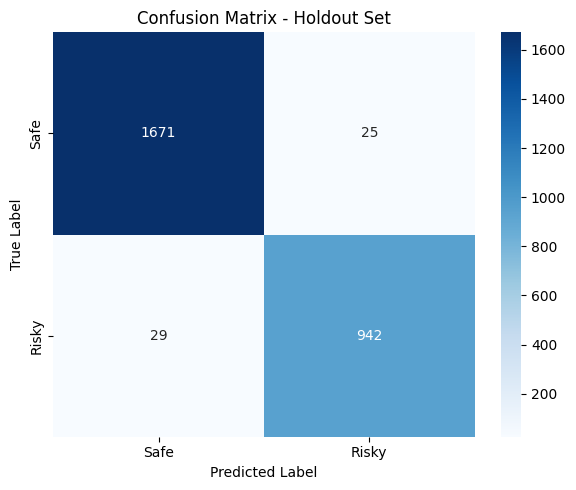

In [61]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Safe", "Risky"], yticklabels=["Safe", "Risky"])
plt.title("Confusion Matrix - Holdout Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


> Time-Based Re-Test on 2024

In [62]:
# Split data
train_df = df[df['Year'] <= 2023]
test_df = df[df['Year'] == 2024]

X_train_final = train_df.drop(columns=["Year", "Risk", "Stock_code"])
y_train_final = train_df["Risk"]
X_test_final = test_df.drop(columns=["Year", "Risk", "Stock_code"])
y_test_final = test_df["Risk"]

# Scale again
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_test_final_scaled = scaler.transform(X_test_final)

# Reduce to selected features from RFE
X_train_final_df = pd.DataFrame(X_train_final_scaled, columns=X.columns)[Selected_features]
X_test_final_df = pd.DataFrame(X_test_final_scaled, columns=X.columns)[Selected_features]

# Retrain and predict
lgbm_selected .fit(X_train_final_df, y_train_final)
y_pred_2024 = lgbm_selected .predict(X_test_final_df)
y_prob_2024 = lgbm_selected .predict_proba(X_test_final_df)[:, 1]

# Evaluate
print("\n2024 Time-Split Re-Test")
print(f"Accuracy: {accuracy_score(y_test_final, y_pred_2024):.4f}")
print(f"F1 Score: {f1_score(y_test_final, y_pred_2024):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_final, y_prob_2024):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_final, y_pred_2024, target_names=["Safe", "Risky"]))

[LightGBM] [Info] Number of positive: 3340, number of negative: 5549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 8889, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375745 -> initscore=-0.507647
[LightGBM] [Info] Start training from score -0.507647

2024 Time-Split Re-Test
Accuracy: 0.9849
F1 Score: 0.9769
ROC AUC: 0.9993

Classification Report:
              precision    recall  f1-score   support

        Safe       0.99      0.99      0.99       667
       Risky       0.98      0.97      0.98       326

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



> visualize

In [64]:
cm = confusion_matrix(y_test, y_pred_sel)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Safe", "Risky"], yticklabels=["Safe", "Risky"])
plt.title("Confusion Matrix - Holdout Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2667, 2965]

<Axes: xlabel='True', ylabel='count'>

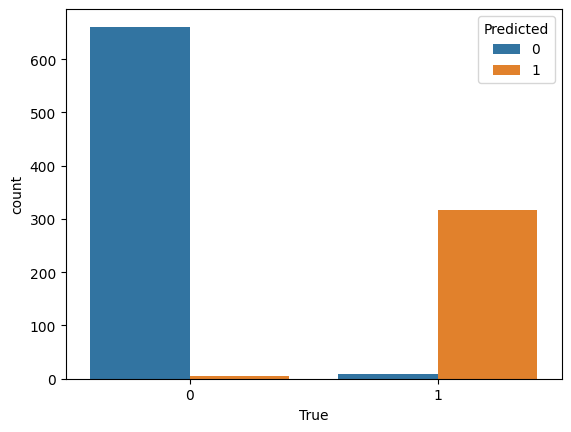

In [53]:
comparison_df = pd.DataFrame({'True': y_test_final, 'Predicted': y_pred_2024})
sns.countplot(data=comparison_df, x='True', hue='Predicted')

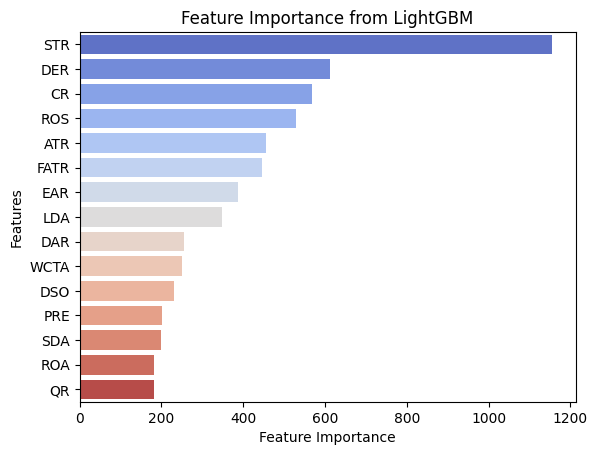

In [56]:
importances = lgbm_selected.feature_importances_
importances = pd.Series(importances, index=X_train_selected.columns).sort_values(ascending=False)

sns.barplot(x=importances, y=importances.index, palette='coolwarm')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from LightGBM')
plt.show()

<Axes: xlabel='Model', ylabel='value'>

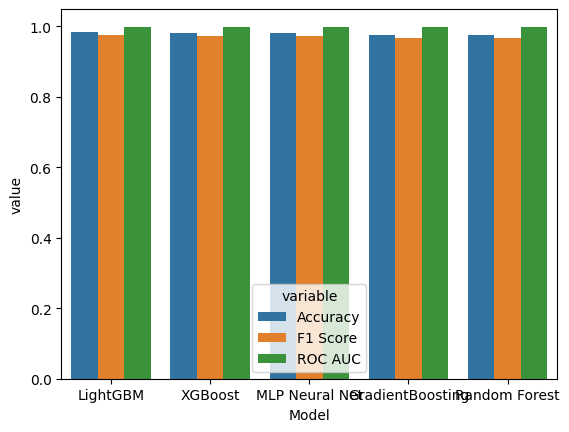

In [58]:
sns.barplot(data=benchmark_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')

<Axes: >

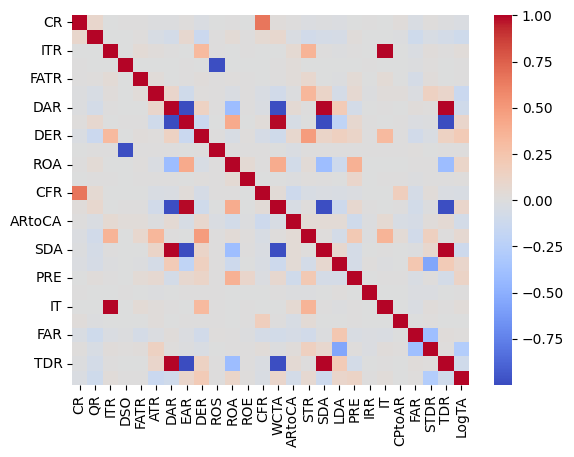

In [59]:
sns.heatmap(X.corr(), cmap='coolwarm')

> save

In [62]:
joblib.dump(lgbm_selected, 'best_lightgbm_model.pkl')

# model = joblib.load('best_lightgbm_model.pkl')

['best_lightgbm_model.pkl']